# 1. Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
from scipy.interpolate import interp1d
from utils_CR import CR

## Observations

In [2]:
data_dir = 'Data_files'

H and He:

In [3]:
data = os.path.join(data_dir, 'prot_AMS_2011-2013.dat')
Emeanp, Emeanp_low, Emeanp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxp, fluxp_low, fluxp_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxp = (fluxp_low + fluxp_up)/2

data = os.path.join(data_dir, 'p_flux_ATIC2009.txt')
EmeanAT, EmeanAT_low, EmeanAT_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxAT, fluxAT_low, fluxAT_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxAT = (fluxAT_low + fluxAT_up)/2

data = os.path.join(data_dir, 'p_flux_CREAMIII_ApJ2017.txt')
EmeanCR, EmeanCR_low, EmeanCR_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxCR, fluxCR_low, fluxCR_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxCR = (fluxCR_low + fluxCR_up)/2

data = os.path.join(data_dir, 'DAMPE_protons.txt')
EmeanDA, EmeanDA_low, EmeanDA_up = np.loadtxt(data,skiprows=1,usecols=(1, 0, 2), unpack=True)
fluxDA, fluxDA_low, fluxDA_up = np.loadtxt(data,skiprows=1,usecols=(4, 3, 5), unpack=True)
errfluxDA = (fluxDA_low + fluxDA_up)/2

data = os.path.join(data_dir, 'He_AMS_2011-2013.dat')
EmeanHe, EmeanHe_low, EmeanHe_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxHe, fluxHe_low, fluxHe_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxHe = (fluxHe_low + fluxHe_up)/2

C

In [38]:
data = os.path.join(data_dir, 'C_AMS_PRL2017.txt')
EmeanC, EmeanC_low, EmeanC_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxC, fluxC_low, fluxC_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxC = (fluxC_low + fluxC_up)/2

myZ = 6
data = os.path.join(data_dir, 'apjaa2409t9_ascii.txt') 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA


O

In [43]:
data = os.path.join(data_dir, 'O_AMS_PRL2017.txt') 
EmeanO, EmeanO_low, EmeanO_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxO, fluxO_low, fluxO_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)

errfluxO = (fluxO_low + fluxO_up)/2

myZ = 8
data = os.path.join(data_dir, 'apjaa2409t9_ascii.txt') 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA

B/C

In [50]:
data = os.path.join(data_dir, 'B_C_ratio_AMS_PRL2018.txt')
EmeanBC = np.loadtxt(data,skiprows=0,usecols=(0,))
fluxBC, fluxBC_low, fluxBC_up = np.loadtxt(data,skiprows=0,usecols=(3,4, 5), unpack=True)
errfluxBC = (fluxBC_low + fluxBC_up)/2


## Voyager data
def voyerr(a, b, da, db):
    if ((type(a) != np.ndarray) or (type(b) != np.ndarray) or 
        (type(da) != np.ndarray) or (type(db) != np.ndarray)):
        print("Error, the Fluxes (Energies) and errFluxes (ErrEnergies) must be an array")
    return np.sqrt((da/b)**2 + (-a*db/b**2)**2)


MyZ = 6
data = os.path.join(data_dir, 'apjaa2409t9_ascii.txt') 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA2, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA2 = (1e-3*(0.5*(Emean_min + Emean_max)))[Z ==MyZ]

errfluxA2 = (np.sqrt(sys**2 + sig**2))[Z==MyZ]
fluxA2 = 1e3*fluxA2[Z==MyZ]

errfluxA2 = (errfluxA2[EmeanA2 > 0.01])
fluxA2 = fluxA2[EmeanA2>0.01]

Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA2>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA2>0.01]

Emean_minA2 = EmeanA2[EmeanA2>0.01] - Emean_min
Emean_maxA2 = Emean_max - EmeanA2[EmeanA2>0.01] 

EmeanA2 = EmeanA2[EmeanA2>0.01]


MyZ = 5
data = os.path.join(data_dir, 'apjaa2409t9_ascii.txt') # ϕ=564 ± 26 MV
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z==MyZ]
errfluxA = 1e3*np.sqrt(sys**2 + sig**2)[Z==MyZ]
fluxA = 1e3*fluxA[Z==MyZ]

errfluxA = (errfluxA[EmeanA > 0.01])
fluxA = fluxA[EmeanA>0.01]
Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA>0.01]

Emean_min = EmeanA[EmeanA>0.01] - Emean_min
Emean_max = Emean_max - EmeanA[EmeanA>0.01] 

EmeanA = EmeanA[EmeanA>0.01]
Etot = np.sort(list(EmeanBC)+ list(EmeanA))

fluxA2_new = np.interp(EmeanA, EmeanA2, fluxA2)
errfluxA2_new = np.interp(EmeanA, EmeanA2, errfluxA2)
EnerrA2 = 0.5*(Emean_minA2 + Emean_maxA2)
errEnA2_new = np.interp(EmeanA, EmeanA2, EnerrA2)

fluxerr = voyerr(fluxA, fluxA2_new, errfluxA, errfluxA2_new)
EnerrA = 0.5*(Emean_min + Emean_max)
Enerr = voyerr(fluxA, fluxA2_new, EnerrA, errEnA2_new)




## DRAGON output

In [51]:
output_dir = 'output'
FILE = os.path.join(output_dir, 'run_2D_DM_0.fits.gz')
print(FILE)

output/run_2D_DM_0.fits.gz


In [33]:
hdulist = fits.open(FILE) 
#hdulist.info() 
prihdr = hdulist[0].header  # the primary header 
n_ext  = len(hdulist)


table_hdu    = hdulist[0]              
table_header = table_hdu.header     # header attribute of TABLE 
'''
zmin   = table_header['zmin']
zmax   = table_header['zmax']
rmin   = table_header['rmin']
rmax   = table_header['rmax']
izsun  = table_header['izsun']
irsun  = table_header['irsun']
dimz   = table_header['dimz']
dimr   = table_header['dimr']
robs   = table_header['robs']
zobs   = table_header['zobs']
'''
izsun  = table_header['izsun']
irsun  = table_header['irsun']

emin   = table_header['ekmin']
ek_fac = table_header['ekin_fac']
dimE   = table_header['dimE'] 

E = [emin*(ek_fac**i) for i in range(0,dimE)]
E = np.array(E)

table_H1_P, table_H1_S, table_H2, table_H3, table_He4, table_He3, table_C12, table_C13, table_C14, table_N14, table_N15, table_O16, table_O17, table_O18, table_Ne, table_Mg, table_Si = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
table_Li6, table_Li7, table_Be7, table_Be9, table_Be10, table_B10, table_B11 = [], [], [], [], [], [], []
for i in range(1,n_ext): #points in the list         

    ## Main CRs
    if hdulist[i].header['A'] == 12 and hdulist[i].header['Z_'] == 6 :
        table_C12.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 13 and hdulist[i].header['Z_'] == 6 :
        table_C13.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 14 and hdulist[i].header['Z_'] == 6 :
        table_C14.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 14 and hdulist[i].header['Z_'] == 7 :
        table_N14.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 15 and hdulist[i].header['Z_'] == 7 :
        table_N15.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 16 and hdulist[i].header['Z_'] == 8 :
        table_O16.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 17 and hdulist[i].header['Z_'] == 8 :
        table_O17.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 18 and hdulist[i].header['Z_'] == 8 :
        table_O18.append(hdulist[i].data)

    elif hdulist[i].header['A'] == 20 and hdulist[i].header['Z_'] == 10:
        table_Ne.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 24 and hdulist[i].header['Z_'] == 12:
        table_Mg.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 28 and hdulist[i].header['Z_'] == 14:
        table_Si.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 0 :
        table_H1_P.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 1 :
        table_H1_S.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 2 and hdulist[i].header['Z_'] == 1 :
        table_H2.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 1 :
        table_H3.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 4 and hdulist[i].header['Z_'] == 2 :
        table_He4.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 2 :
        table_He3.append(hdulist[i].data)
        
    ## LiBeB group
    elif hdulist[i].header['A'] == 10 and hdulist[i].header['Z_'] == 5 :
        table_B10.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 11 and hdulist[i].header['Z_'] == 5 :
        table_B11.append(hdulist[i].data)
            
    elif hdulist[i].header['A'] == 7 and hdulist[i].header['Z_'] == 4 :
        table_Be7.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 9 and hdulist[i].header['Z_'] == 4 :
        table_Be9.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 10 and hdulist[i].header['Z_'] == 4 :
        table_Be10.append(hdulist[i].data)
            
    elif hdulist[i].header['A'] == 6 and hdulist[i].header['Z_'] == 3 :
        table_Li6.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 7 and hdulist[i].header['Z_'] == 3 :
        table_Li7.append(hdulist[i].data)
        

table_H1 = np.array(table_H1_P + table_H1_S)

In [42]:
izsun  = table_header['izsun']
irsun  = table_header['irsun']
dimz   = table_header['dimz']
dimr   = table_header['dimr']

table_H1.shape, np.array(table_He4).shape, irsun, izsun, (dimr, dimz), table_C12


((2, 81, 41, 56), (1, 81, 41, 56), 27, 40, (41, 81), [])

# 2. Plots

Parameters for the plots:

In [6]:
widths = [1]
heights = [2.8,1.]
gs_kw = dict(width_ratios=widths, height_ratios=heights)

Fisk potential adopted to account for Solar modulation (parameter `phi_nuc` in the function `CR.modul()` defined in `utils_CR.py`):

In [7]:
phi_ams = 0.61  ## Fisk potential adopted to make the plots

## H and He

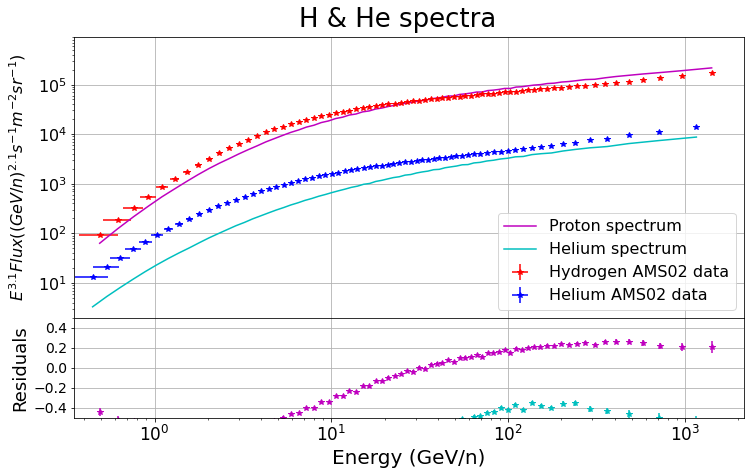

In [37]:
fig1, (frame1,frame2) = plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("H & He spectra", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log')#, nonposx = 'clip')

frame1.errorbar(Emeanp, fluxp*np.power(Emeanp, 3.1), xerr = [(Emeanp-Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], yerr = [fluxp_low*np.power(Emeanp, 3.1), fluxp_up*np.power(Emeanp, 3.1)], fmt= '*r', label = "Hydrogen AMS02 data") #Real data

frame1.errorbar(EmeanHe, fluxHe*np.power(EmeanHe, 3.1), xerr = [(EmeanHe-EmeanHe_low)/EmeanHe, (EmeanHe_up-EmeanHe)/EmeanHe], yerr = [fluxHe_low*np.power(EmeanHe, 3.1), fluxHe_up*np.power(EmeanHe, 3.1)], fmt= '*b', label = "Helium AMS02 data") #Real data

H1 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0, izsun, irsun, :], 1, 1, phi_ams))
H2 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0, izsun, irsun, :], 1, 2, phi_ams))
H3 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0, izsun, irsun, :], 1, 3, phi_ams))

mod0 = H1 + H2 + H3

frame1.plot(Emeanp, mod0*(Emeanp**3.1), "m-", label='Proton spectrum')

He3 = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He3)[0, izsun, irsun], 2, 3, phi_ams))
He4 = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He4)[0, izsun, irsun], 2, 4, phi_ams))

mod1 = He4 + He3

frame1.plot(EmeanHe, mod1*(EmeanHe**3.1), "c-", label='Helium spectrum')


frame1.set_ylabel(r"$E^{3.1} Flux ((GeV/n)^{2.1} s^{-1} m^{-2} sr^{-1})$", fontsize = 16, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=16)
frame1.grid()
frame1.set_ylim(bottom = 2, top = 9e5)
frame1.set_xlim(left = 0.35)#, right = 2000)
frame1.legend(fontsize =16, loc = 4)


frame2.set_xscale("log")

diff = np.array(mod0-fluxp)
frame2.errorbar(Emeanp, diff/mod0, yerr = [(fluxp_up/fluxp), (fluxp_low/fluxp)],  fmt= "m*")

diff = np.array(mod1-fluxHe)
frame2.errorbar(EmeanHe, diff/mod1, yerr = [(fluxHe_up/fluxHe), (fluxHe_low/fluxHe)], fmt= "c*")


frame2.set_ylabel("Residuals", fontsize = 18)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 20)
frame2.set_xlim(left = 0.35)#, right = 1800)
frame2.grid()

plt.xticks(fontsize=17)
plt.yticks(fontsize=14)
frame2.set_ylim(bottom = -0.5, top = 0.5)
#frame2.legend(ncol = 4, loc = 0) #1 is upper right
#plt.savefig('plots/pHe_spectrum_BaseModel.png')
#plt.savefig('plots/pHe_spectrum_BaseModel.pdf')
plt.show()
plt.close()

# CARBON data

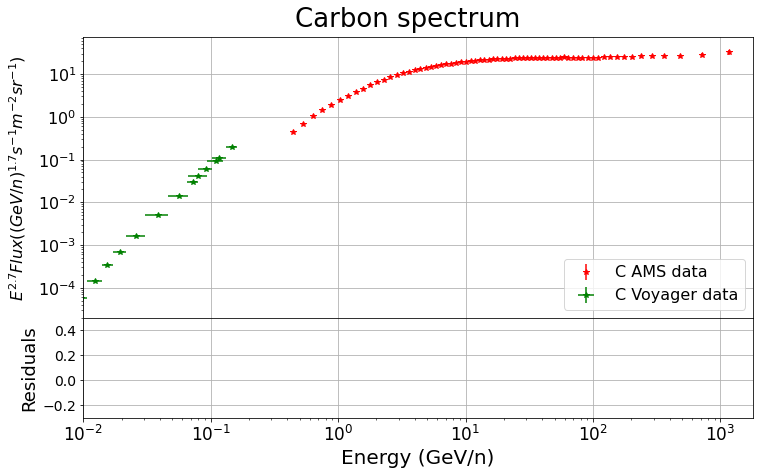

In [46]:
fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Carbon spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log')#, nonposx = 'clip')

frame1.errorbar(EmeanC, fluxC*np.power(EmeanC, 2.7), yerr = [fluxC_low*np.power(EmeanC, 2.7), fluxC_up*np.power(EmeanC, 2.7)], fmt= '*r', label = "C AMS data") #Real data
frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr = [Emean_min, Emean_max], yerr = errfluxA*np.power(EmeanA, 2.7), fmt= '*g', label = "C Voyager data") #Real data

'''
myZ = 6
C12 = np.interp(EmeanC, E, CR.modul(E, np.array(table_C12)[0, izsun, irsun], myZ, 12, phi_ams))
C13 = np.interp(EmeanC, E, CR.modul(E, np.array(table_C13)[0, izsun, irsun], myZ, 13, phi_ams))
C14 = np.interp(EmeanC, E, CR.modul(E, np.array(table_C14)[0, izsun, irsun], myZ, 14, phi_ams))
#C12 = interp1d(E, CR.modul(E, np.array(table_C12)[0], myZ, 12, phi_ams), 'cubic')
#C13 = interp1d(E, CR.modul(E, np.array(table_C13)[0], myZ, 13, phi_ams), 'cubic')
#C14 = interp1d(E, CR.modul(E, np.array(table_C14)[0], myZ, 14, phi_ams), 'cubic')

mod0 = C12 + C13 + C14
#mod0 = C12(EmeanC) + C13(EmeanC) + C14(EmeanC)

frame1.plot(EmeanC, mod0*(EmeanC**2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_C12) + np.array(table_C13) + np.array(table_C14))[0])
frame1.plot(E, mod1*(E**2.7), "b--", label='Unmodulated spectrum')
'''

frame1.set_ylabel(r"$E^{2.7} Flux ((GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1})$", fontsize = 16, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=16)
frame1.grid()
frame1.set_ylim(2*1e-5)
frame1.set_xlim(left = 0.001, right = 2000)
frame1.legend(fontsize =16, loc = 4)

frame2.set_xscale("log")

'''
diff = np.array(mod0-fluxC)
frame2.errorbar(EmeanC, diff/mod0, yerr = [(fluxC_up/fluxC), (fluxC_low/fluxC)],  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-fluxA)
frame2.errorbar(EmeanA, diff/mod1, yerr = errfluxA/fluxA, xerr = [Emean_min, Emean_max],  fmt= "g*")
'''


frame2.set_ylabel("Residuals", fontsize = 18)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 20)
frame2.set_xlim(left = 0.01, right = 1800)
frame2.grid()
plt.xticks(fontsize=17)
plt.yticks(fontsize=14)
frame2.set_ylim(bottom = -0.3, top = 0.5)
#frame2.legend(ncol = 4, loc = 0) #1 is upper right
#plt.savefig('plots/C_spectrum_BaseModel.png')
#plt.savefig('plots/C_spectrum_BaseModel.pdf')
plt.show()
plt.close()

# OXYGEN data

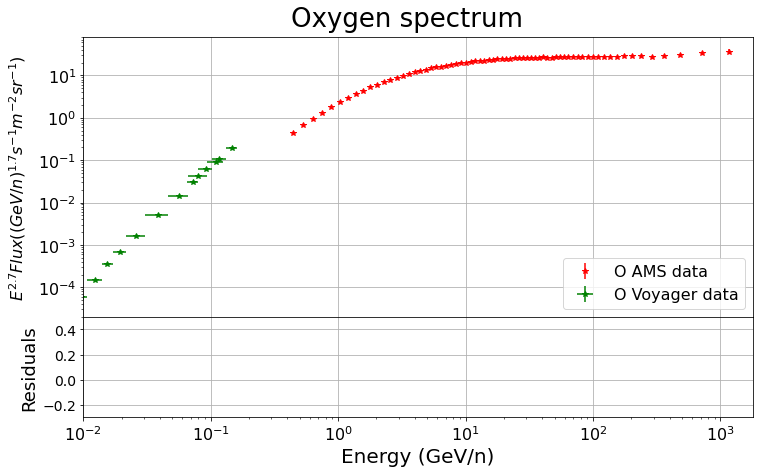

In [48]:
fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Oxygen spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log')#, nonposx = 'clip')

frame1.errorbar(EmeanO, fluxO*np.power(EmeanO, 2.7), yerr=[fluxO_low*np.power(EmeanO, 2.7), fluxO_up*np.power(EmeanO, 2.7)], fmt= '*r', label = "O AMS data") #Real data
frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr=[Emean_min, Emean_max], yerr= errfluxA*np.power(EmeanA, 2.7), fmt= '*g', label = "O Voyager data") #Real data

'''
myZ = 8
O16 = np.interp(EmeanO, E, CR.modul(E, np.array(table_O16)[0], myZ, 16, phi_ams))
O17 = np.interp(EmeanO, E, CR.modul(E, np.array(table_O17)[0], myZ, 17, phi_ams))
O18 = np.interp(EmeanO, E, CR.modul(E, np.array(table_O18)[0], myZ, 18, phi_ams))
mod0 = O16 + O17 + O18
frame1.plot(EmeanO, mod0*(EmeanO**2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_O16) + np.array(table_O17) + np.array(table_O18))[0])
frame1.plot(E, mod1*(E**2.7), "b--", label='Unmodulated spectrum')
'''

frame1.set_ylabel(r"$E^{2.7} Flux ((GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1})$", fontsize = 16, labelpad = 10)
#plt.yticks(fontsize=28)
frame1.tick_params(axis = 'y', labelsize=16)
frame1.grid()
frame1.set_ylim(2*1e-5)
frame1.set_xlim(left = 0.001, right = 2000)
frame1.legend(fontsize =16, loc = 4)

frame2.set_xscale("log")

'''
diff = np.array(mod0-fluxO)
frame2.errorbar(EmeanO, diff/mod0, yerr = errfluxO/fluxO,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-fluxA)
frame2.errorbar(EmeanA, diff/mod1, yerr = errfluxA/fluxA, xerr = [Emean_min, Emean_max],  fmt= "g*")
'''

frame2.set_ylabel("Residuals", fontsize = 18)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 20)
frame2.set_xlim(left = 0.01, right = 1800)
frame2.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
frame2.set_ylim(bottom = -0.3, top = 0.5)
#frame2.legend(ncol = 4, loc = 0) #1 is upper right
#plt.savefig('plots/O_spectrum_Carmelo_BaseModel.png')
#plt.savefig('plots/O_spectrum_Carmelo_BaseModel.pdf')
plt.show()
plt.close()

# B/C PLOT

In [ ]:
#B/C PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("B/C spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanBC, fluxBC, yerr = [fluxBC_low, fluxBC_up], fmt='*r', label = "B/C AMS-02 (2017)") #Real data

frame1.errorbar(EmeanA, (fluxA/fluxA2_new), xerr=Enerr, yerr=fluxerr, fmt= '*g', label = "B/C Voyager 1 (2012-2015)") #Real data

B10 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_B10)[0], 5, 10, phi_ams))
B11 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_B11)[0], 5, 11, phi_ams))

C12 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_C12)[0], 6, 12, phi_ams))
C13 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_C13)[0], 6, 13, phi_ams))
C14 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_C14)[0], 6, 14, phi_ams))

mod0 = (B10 + B11)/(C12 + C13 + C14)
frame1.plot(EmeanBC, mod0, "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_B10) + np.array(table_B11))[0]/(np.array(table_C12) + np.array(table_C13) + np.array(table_C14))[0])
frame1.plot(E, mod1, "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 20)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxBC)
frame2.errorbar(EmeanBC, diff/mod0, yerr = errfluxBC/fluxBC,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-(fluxA/fluxA2_new))
frame2.errorbar(EmeanA, diff/mod1, yerr = fluxerr/(fluxA/fluxA2_new), xerr = [Emean_min, Emean_max],  fmt= "g*")

frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.45, bottom = -0.45)
frame2.set_xlim(right = 3e3, left = 0.01)

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('plots/BC_constant_BaseModel.png')
plt.savefig('plots/BC_constant_BaseModel.pdf')
plt.show()
plt.close()